#### 1. Import pandas library

In [2]:
import pandas as pd

#### 2. Load data (users.csv, posts.csv)

In [3]:
df=pd.read_csv("C:/Users/AaronElias/Desktop/Github/Prueba-Aaron/13-lab-pandas-data-cleaning/your-code/users.csv")
df1=pd.read_csv("C:/Users/AaronElias/Desktop/Github/Prueba-Aaron/13-lab-pandas-data-cleaning/your-code/posts.csv")

In [4]:
df.head(2)
df1.head(2)

,id,owner_user_id,score,view_count,comment_count,favorite_count
0,30336926,NaN,1,14,3,NaN
1,36873524,NaN,1,18,0,1.0


#### 3. Rename id column to user_id

In [7]:
df.rename(columns={'id':'user_id'},inplace=True)
df.head()

,Unnamed: 0,user_id,display_name,about_me,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,views,profile_image_url,website_url
0,0,107658,ivordesign,NaN,NaN,2009-05-15 12:21:51.230000+00:00,2014-08-28 17:43:18.040000+00:00,United Kingdom,305,2,0,91,NaN,http://www.ivorthedesigner.co.uk
1,1,218597,icabod,NaN,NaN,2009-11-25 13:30:42.460000+00:00,2020-05-29 11:44:18.140000+00:00,United Kingdom,6559,361,25,374,NaN,http://icablog.org/
2,2,326360,rbaker86,<p>Software developer and technology enthusias...,NaN,2010-04-26 21:18:19.857000+00:00,2017-12-04 16:49:29.297000+00:00,United Kingdom,1802,40,14,97,NaN,http://na
3,3,379556,Rui Marques,<p>Engineer and Automation Architect at Vonage...,NaN,2010-06-29 23:32:49.870000+00:00,2020-05-28 14:49:23.427000+00:00,United Kingdom,2335,125,10,261,NaN,http://ruimarques.io
4,4,450456,Jules,NaN,NaN,2010-09-17 09:47:09.397000+00:00,2020-05-13 07:03:58.113000+00:00,United Kingdom,7746,256,50,3598,https://i.stack.imgur.com/4Y8Zf.jpg?s=128&g=1,https://www.julesmoorhouse.com


#### 4. Rename id column to post_id and owner_user_id to user_id

In [8]:
df1.rename(columns={'id':'post_id'},inplace=True)
df1.rename(columns={'owner_user_id':'user_id'},inplace=True)
df1.head()

,post_id,user_id,score,view_count,comment_count,favorite_count
0,30336926,NaN,1,14,3,NaN
1,36873524,NaN,1,18,0,1.0
2,36605876,NaN,1,19,0,NaN
3,36718461,NaN,1,17,0,NaN
4,30434893,NaN,0,15,0,NaN


#### 5. Define new dataframes for users and posts with the following selected columns:
    **users columns**: user_id, reputation,views,up_votes,down_votes
    **posts columns**: post_id, score,user_id,view_count,comment_count

In [10]:

a=[df["user_id"],df["reputation"],df["views"],df["up_votes"],df["down_votes"]]
users=pd.concat(a, axis=1)
users.head()

,user_id,reputation,views,up_votes,down_votes
0,107658,305,91,2,0
1,218597,6559,374,361,25
2,326360,1802,97,40,14
3,379556,2335,261,125,10
4,450456,7746,3598,256,50


In [11]:
b=[df1["post_id"],df1["user_id"],df1["view_count"],df1["comment_count"]]
post=pd.concat(b,axis=1 )
post.head()

,post_id,user_id,view_count,comment_count
0,30336926,NaN,14,3
1,36873524,NaN,18,0
2,36605876,NaN,19,0
3,36718461,NaN,17,0
4,30434893,NaN,15,0


#### 6. Merge both dataframes, users and posts. 
You will need to make a [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [18]:
new=users.merge(post, left_on='user_id', right_on='user_id')

In [60]:
new.head()
len(new)

1065

#### 7. How many missing values do you have in your merged dataframe? 

In [20]:
new.isna().sum()

user_id          0
reputation       0
views            0
up_votes         0
down_votes       0
post_id          0
view_count       0
comment_count    0
dtype: int64

There are no missing values

#### Bonus: Identify extreme values in your merged dataframe, create a dataframe called outliers with the same columns as our data set and calculate the bounds. The values of the outliers dataframe will be the values of the merged_df that fall outside that bounds. You will need to save your outliers dataframe to a csv file on your-code folder. Hint: post_id cannot have outliers!

In [93]:
import seaborn as sns
import matplotlib

In [21]:
new.describe()

,user_id,reputation,views,up_votes,down_votes,post_id,view_count,comment_count
count,1.065000e+03,1065.000000,1065.000000,1065.000000,1065.000000,1.065000e+03,1065.000000,1065.000000
mean,2.280169e+06,7251.176526,615.245070,397.688263,49.415023,3.398846e+07,15.606573,0.926761
std,1.833959e+06,24021.612286,1497.407529,747.628862,177.308773,4.495709e+06,3.711159,1.627503
min,2.740000e+02,1.000000,0.000000,0.000000,0.000000,4.142174e+06,3.000000,0.000000
25%,6.532920e+05,246.000000,39.000000,15.000000,0.000000,3.289111e+07,13.000000,0.000000
50%,1.996838e+06,1145.000000,145.000000,96.000000,3.000000,3.556317e+07,17.000000,0.000000
75%,3.545704e+06,5206.000000,496.000000,375.000000,20.000000,3.699112e+07,19.000000,1.000000
max,6.449207e+06,287170.000000,23103.000000,7886.000000,2692.000000,3.776986e+07,20.000000,11.000000


In [70]:
Q1=new.reputation.quantile(0.25)
Q3=new.reputation.quantile(0.75)
IQR=(Q3 - Q1)
lim_infe=Q1 - IQR*1.5
lim_supe=Q3 + IQR*1.5
print(lim_supe)
print(lim_infe)

12646.0
-7194.0


In [69]:
out_reputation=new[(new["reputation"]<lim_infe) | (new["reputation"]> lim_supe)]
out_reputation.sort_values("reputation", ascending=False)

,user_id,reputation,views,up_votes,down_votes,post_id,view_count,comment_count
937,507674,287170,23103,1417,1686,36012966,18,4
95,6068,244872,11737,934,98,36953621,11,0
96,6068,244872,11737,934,98,33842576,6,0
97,6068,244872,11737,934,98,37330755,10,0
98,6068,244872,11737,934,98,29285164,17,0
...,...,...,...,...,...,...,...,...
915,1019952,13079,855,471,16,34041866,9,0
916,1019952,13079,855,471,16,37499742,17,7
129,276193,13076,809,1697,46,37379076,17,0
963,2541,13009,3873,1943,270,29386926,20,2


In [64]:
Q1=new.views.quantile(0.25)
Q3=new.views.quantile(0.75)
IQR=(Q3 - Q1)
lim_infe=Q1 - IQR*1.5
lim_supe=Q3 + IQR*1.5
lim_supe

1181.5

In [66]:
out_views=new[(new["views"]<lim_infe) | (new["views"]> lim_supe)]
out_views.sort_values("views", ascending=False)

,user_id,reputation,views,up_votes,down_votes,post_id,view_count,comment_count
937,507674,287170,23103,1417,1686,36012966,18,4
101,6068,244872,11737,934,98,36912191,19,0
98,6068,244872,11737,934,98,29285164,17,0
96,6068,244872,11737,934,98,33842576,6,0
95,6068,244872,11737,934,98,36953621,11,0
...,...,...,...,...,...,...,...,...
340,3697264,3760,1235,335,84,36641650,10,0
341,3697264,3760,1235,335,84,36624645,13,0
32,1076743,7425,1225,454,121,15036385,16,0
31,1076743,7425,1225,454,121,33428716,17,0


In [71]:
Q1=new.up_votes.quantile(0.25)
Q3=new.up_votes.quantile(0.75)
IQR=(Q3 - Q1)
lim_infe=Q1 - IQR*1.5
lim_supe=Q3 + IQR*1.5
print(lim_supe)
print(lim_infe)

915.0
-525.0


In [72]:
out_up_votes=new[(new["up_votes"]<lim_infe) | (new["up_votes"]> lim_supe)]
out_up_votes.sort_values("up_votes", ascending=False)

,user_id,reputation,views,up_votes,down_votes,post_id,view_count,comment_count
306,13744,48044,3407,7886,1046,33372277,12,0
592,1006010,56330,2751,5581,1,33078084,12,1
246,180430,12785,1059,4846,320,37252735,15,0
294,156755,24254,5441,3901,294,15047053,16,4
326,2120261,23011,1014,3851,23,37213268,15,0
...,...,...,...,...,...,...,...,...
99,6068,244872,11737,934,98,37093383,11,0
100,6068,244872,11737,934,98,37257134,18,0
101,6068,244872,11737,934,98,36912191,19,0
781,1252987,1843,198,930,139,31249324,20,0


In [73]:
Q1=new.down_votes.quantile(0.25)
Q3=new.down_votes.quantile(0.75)
IQR=(Q3 - Q1)
lim_infe=Q1 - IQR*1.5
lim_supe=Q3 + IQR*1.5
print(lim_supe)
print(lim_infe)

50.0
-30.0


In [74]:
out_down_votes=new[(new["down_votes"]<lim_infe) | (new["down_votes"]> lim_supe)]
out_down_votes.sort_values("down_votes", ascending=False)

,user_id,reputation,views,up_votes,down_votes,post_id,view_count,comment_count
244,1084416,19698,4817,3191,2692,35725444,10,0
937,507674,287170,23103,1417,1686,36012966,18,4
316,14357,99633,8970,2418,1498,13199838,20,0
315,14357,99633,8970,2418,1498,33375247,12,1
934,325900,5897,1024,1018,1224,34131406,14,1
...,...,...,...,...,...,...,...,...
797,11755,22166,2569,471,56,34769995,14,2
796,11755,22166,2569,471,56,35864852,18,0
728,56672,9925,1209,808,55,30850819,15,0
379,285190,6343,531,1524,52,35015334,18,0


In [77]:
Q1=new.view_count.quantile(0.25)
Q3=new.view_count.quantile(0.75)
IQR=(Q3 - Q1)
lim_infe=Q1 - IQR*1.5
lim_supe=Q3 + IQR*1.5
print(lim_supe)
print(lim_infe)

28.0
4.0


In [78]:
out_view_count=new[(new["view_count"]<lim_infe) | (new["view_count"]> lim_supe)]
out_view_count.sort_values("view_count", ascending=False)

,user_id,reputation,views,up_votes,down_votes,post_id,view_count,comment_count
237,3861272,41,18,0,0,37531244,3,0


In [79]:
Q1=new.comment_count.quantile(0.25)
Q3=new.comment_count.quantile(0.75)
IQR=(Q3 - Q1)
lim_infe=Q1 - IQR*1.5
lim_supe=Q3 + IQR*1.5
print(lim_supe)
print(lim_infe)

2.5
-1.5


In [80]:
out_comment_count=new[(new["comment_count"]<lim_infe) | (new["comment_count"]> lim_supe)]
out_comment_count.sort_values("comment_count", ascending=False)

,user_id,reputation,views,up_votes,down_votes,post_id,view_count,comment_count
168,404568,11753,1003,373,67,30335961,19,11
161,3482098,450,49,66,2,32974547,20,10
447,1700106,1877,216,1203,3,37482402,16,10
215,5679437,38,9,0,0,34275641,19,10
858,3476240,13,9,0,0,37300886,18,10
...,...,...,...,...,...,...,...,...
160,3033149,898,116,227,9,30007581,14,3
174,1284680,1167,85,16,0,37264605,12,3
181,1527537,786,89,51,22,36699401,18,3
582,6144451,1147,335,55,0,36960797,20,3


In [84]:
pd.merge(out_reputation["reputation"], out_views["views"],out_up_votes["up_votes"], out_down_votes["down_votes"], out_view_count["view_count"], out_comment_count["comment_count"],how='outer')

TypeError: merge() got multiple values for argument 'how'

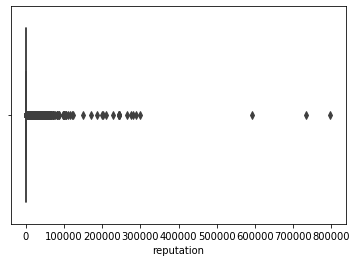

In [86]:
sns.boxplot(x=new['reputation'])